## Image Classification using a Convolutional Neural Network

#### Shrita Gaonkar(100799307)

#### AIDI 2000 - Applied Machine Learning - Lab #1

# Build and save an object detection model for CIFAR-10 dataset

### Write a small description about this dataset.

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms.

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. 

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. 

There are 6,000 images of each class.

There are 50,000 training images and 10,000 testing images.

Reference : https://en.wikipedia.org/wiki/CIFAR-10

# Information about data

In [1]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
print("Shape of X_train: ", X_train.shape)
print('Shape of y_train: ', y_train.shape)
print("Shape of X_test: ", X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000, 1)
Shape of X_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000, 1)


# Creating a CNN-based Image Classifier

### Design the CNN architecture as below:

## Import libraries

In [3]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Defining the functions for loading, processing the data and building the model.

In [4]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

def define_model():
    model = Sequential()
    # Hidden layer1
    # CONV1a
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform',  input_shape=(32, 32, 3)))
    # CONV1b
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    # POOL1
    model.add(MaxPooling2D((2, 2)))
    # Hidden layer2
    # CONV2a
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    # CONV2b
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    # POOL 2
    model.add(MaxPooling2D((2, 2)))
    # Hidden layer3
    # CONV3a
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    # CONV3b
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    # POOL3
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    # Fully connected layer
    model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # Use a stochastic gradient descent with learning rate of 0.001, momentum=0.9
    opt = SGD(lr = 0.001, momentum=0.9) 
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def run_test_harness():
    trainX, trainY, testX, testY = load_dataset()
    trainX, testX = prep_pixels(trainX, testX)
    model = define_model()
    # Use a batch_size= 32, epochs=10
    model.fit(trainX, trainY, epochs = 10,  batch_size=32) 
    # Save the model
    model.save('final_mod.h5')  

run_test_harness()

Epoch 1/10
50000/50000 [==============================] - 203s 4ms/step - loss: 1.6434 - accuracy: 0.4071
Epoch 2/10
50000/50000 [==============================] - 201s 4ms/step - loss: 1.2750 - accuracy: 0.5469
Epoch 3/10
50000/50000 [==============================] - 202s 4ms/step - loss: 1.0885 - accuracy: 0.6157
Epoch 4/10
50000/50000 [==============================] - 200s 4ms/step - loss: 0.9497 - accuracy: 0.6674
Epoch 5/10
50000/50000 [==============================] - 197s 4ms/step - loss: 0.8399 - accuracy: 0.7074
Epoch 6/10
50000/50000 [==============================] - 202s 4ms/step - loss: 0.7458 - accuracy: 0.7394
Epoch 7/10
50000/50000 [==============================] - 200s 4ms/step - loss: 0.6621 - accuracy: 0.7679
Epoch 8/10
50000/50000 [==============================] - 198s 4ms/step - loss: 0.5906 - accuracy: 0.7933
Epoch 9/10
50000/50000 [==============================] - 198s 4ms/step - loss: 0.5212 - accuracy: 0.8179
Epoch 10/10
50000/50000 [=====================

Here, we can see the time taken for each epoch and the accuracy at each epoch

## Defining a function for evaluation of the model after loading the saved model

In [5]:
def eval_model():
    # Find the accuracy of the model from our saved model file.
    X_train, y_train, X_test, y_test = load_dataset()
    X_train, X_test = prep_pixels(X_train, X_test)
    model = load_model('final_mod.h5')
    _, acc = model.evaluate(X_test, y_test, verbose = 1)
    print('Accuracy on Test Dataset: {:.2f}%'.format(acc*100))

In [6]:
eval_model()

10000/10000 [==============================] - 19s 2ms/step
Accuracy on Test Dataset: 72.28%


The accuracy of the model is 72.28%

# Predicting a test image

## Defining a function that will get the test image and process it

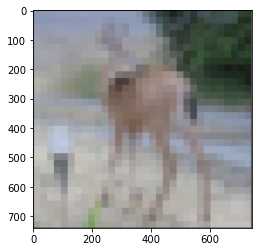

In [7]:
def load_image(filename):
    img = load_img(filename, color_mode ='rgb', target_size=(32, 32))
    
    img = img_to_array(img)
    img = img.reshape(1, 32, 32, 3)

    img = img.astype('float32')
    img = img / 255.0
    
    return img

# sample.png is the new test data which needs to be predicted

img1 = mpimg.imread('sample.png')
imgplot = plt.imshow(img1)
plt.show()

img = load_image('sample.png')
model = load_model('final_mod.h5')

# Using predict_classes to predict the class of given image

In [8]:
result =  model.predict_classes(img)

if result[0] == 0:
    print('The image belongs to Class Airplane')
    
elif result[0] ==1:
    print('The image belongs to Class Automobile')
    
elif result[0] ==2:
    print('The image belongs to Class Bird')

elif result[0] ==3:
    print('The image belongs to Class Cat')

elif result[0] ==4:
    print('The image belongs to Class Deer')

elif result[0] ==5:
    print('The image belongs to Class Dog')
    
elif result[0] ==6:
    print('The image belongs to Class Frog')
    
elif result[0] ==7:
    print('The image belongs to Class Horse')
    
elif result[0] ==8:
    print('The image belongs to Class Ship')
    
elif result[0] ==9:
    print(' The image belongs to Class Truck')
    
else:
    print('The image is not in the list')

The image belongs to Class Deer


The image that was fed as an input into our model was successfully classified as a Deer.